<a href="https://colab.research.google.com/github/shamanth1998/Emotional_mining/blob/main/Named_Entity_Recognition_Emotion_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Named Entity Recognition

In [ ]:
pip install spacy==2.3.0

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install wordcloud 

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import spacy

In [ ]:
spacy.__version__

'2.3.0'

In [ ]:
!python -m spacy validate


[+] Loaded compatibility table

====================== Installed models (spaCy v2.3.0) ======================
[i] spaCy installation: C:\python\lib\site-packages\spacy

TYPE      NAME             MODEL            VERSION      
package   en-core-web-sm   en_core_web_sm   2.3.0     [+]



In [ ]:
pip install wordcloud

You should consider upgrading via the '/Users/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
#pip install -U preshed

In [ ]:
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [ ]:
!python -m spacy download en_core_web_md

# restart kernel 

# start

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [ ]:
import pandas
book=pd.read_csv("apple.txt",error_bad_lines=False)

b'Skipping line 6: expected 1 fields, saw 14\n'


In [ ]:
"    furhufi.    ".strip()

'furhufi.'

In [ ]:
book = [x.strip() for x in book.x] # remove both the leading and the trailing characters
book = [x for x in book if x] # removes empty strings, because they are considered in Python as False
book[0]

"It's amazing..... battery last around 10 -12 hrs.....best laptop for students and coders"

In [ ]:
#ner

##Part Of Speech Tagging
#nlp = spacy.load('en')
nlp = spacy.load("en_core_web_sm")
one_block = book[10]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [ ]:
spacy.load("en_core_web_sm")

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")
doc = nlp(u"This is a sentence.")

In [ ]:
one_block

"Hi, Think thousand time before buying. One calm night i was cuddling in jaipuri blanket while enjoying youtube on this expensive machine. Cold night and little excitement created electrostatic charge which spike though spaceBar button. that's how it went to deep sleep forever. Nothing can bring it back and i am in no mood in spending another fortune on this machine. Apple, of you (i)care, this is the least of security feature included in all electronic devices. And the best part, it was a week after Warranty expiration date."

In [ ]:
doc_block = nlp(one_block)
for token in doc_block[:]:
    print(token, token.pos_)

Hi INTJ
, PUNCT
Think VERB
thousand NUM
time NOUN
before ADP
buying NOUN
. PUNCT
One NUM
calm ADJ
night NOUN
i PRON
was AUX
cuddling VERB
in ADP
jaipuri PROPN
blanket NOUN
while SCONJ
enjoying VERB
youtube NOUN
on ADP
this DET
expensive ADJ
machine NOUN
. PUNCT
Cold ADJ
night NOUN
and CCONJ
little ADJ
excitement NOUN
created VERB
electrostatic ADJ
charge NOUN
which DET
spike VERB
though SCONJ
spaceBar PROPN
button PROPN
. PUNCT
that DET
's AUX
how ADV
it PRON
went VERB
to ADP
deep ADJ
sleep NOUN
forever ADV
. PUNCT
Nothing PRON
can VERB
bring VERB
it PRON
back ADV
and CCONJ
i PRON
am AUX
in ADP
no DET
mood NOUN
in ADP
spending VERB
another DET
fortune NOUN
on ADP
this DET
machine NOUN
. PUNCT
Apple PROPN
, PUNCT
of ADP
you PRON
( PUNCT
i)care X
, PUNCT
this DET
is AUX
the DET
least ADJ
of ADP
security NOUN
feature NOUN
included VERB
in ADP
all DET
electronic ADJ
devices NOUN
. PUNCT
And CCONJ
the DET
best ADJ
part NOUN
, PUNCT
it PRON
was AUX
a DET
week NOUN
after ADP
Warranty PROPN
ex

In [ ]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs[5:25])

['kind', 'process', 'lag.3', 'looks', 'feels', 'product.4', 'battery', 'life', 'sound', 'clarity5', 'Purchased', 'sale', 'cost', '52k', 'Cons:1', 'memory2', 'softwares', 'available3', 'Operating', 'system']


In [ ]:
#Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df[0:10]

,word,count
0,weight,1
1,response,1
2,time2,1
3,optimize,1
4,avoids,1
5,kind,1
6,process,1
7,lag,1
8,looks,1
9,feels,1


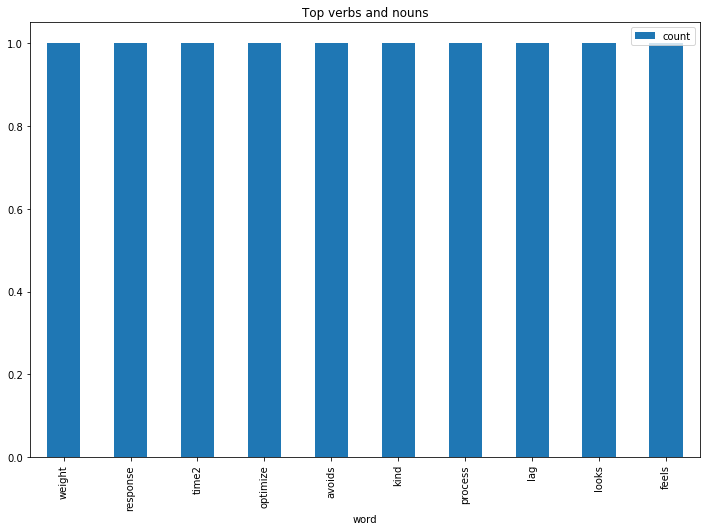

In [ ]:
##Visualizing results
#Barchart for top 10 nouns + verbs
wf_df[0:10].plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns')

#### Emotion Mining

In [ ]:
#Sentiment analysis
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [ ]:
afinn.head(20)

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
5,abductions,-2
6,abhor,-3
7,abhorred,-3
8,abhorrent,-3
9,abhors,-3


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

import pandas
book=pd.read_csv("apple.txt",error_bad_lines=False)
book = [x.strip() for x in book.x] # remove both the leading and the trailing characters
book = [x for x in book if x] # removes empty strings, because they are considered in Python as False

b'Skipping line 6: expected 1 fields, saw 14\n'


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gokul\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [ ]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(book))
sentences[5:15]

['), all printers are not compatible (e.g.',
 "the most economical MFD laser printer RICOH SP 111 can't be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you master it by working on these (still mostly the document and slides either do not open in windows environment or have distortion issues).",
 'you need to spend extra for an external CD writer and tp buy a carry bag.',
 'Mac con not be connected to most of the projectors unless you buy some connectors, which are expensive and theres no clarity which one to buy and from where.',
 "you can't connect it to your TV, the ports are different and again theres no clarity - customer support, manuals or help section are silent !",
 'Marketing strategy for Indian market, if at all has been planned, has been very bad.',
 'If these critical issues (and a few more not mentioned here) are handled properly, the Mac can sweep away other laptops in India.',
 "Presently, it doesn't seem to be happening.Overall V

In [ ]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,It's amazing..... battery last around 10 -12 h...
1,Got it in 50k in Diwali sale.
2,Technically good laptop.Good News.luxury produ...
3,Terrific sense of possession & pride.Bad News.
4,Problems will be there if you are switching fr...
...,...
182,You can get one of the best movie experiences ...
183,Overall I would it a 4.5/5.
184,"I got a great deal on this laptop, which I hav..."
185,I got it not only on discount but also was abl...


In [ ]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [ ]:
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [ ]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
#nlp = spacy.load('en')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [ ]:
# test that it works
calculate_sentiment(text = 'i am feeling diwali')

0

In [ ]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [ ]:
sent_df

,sentence,sentiment_value
0,It's amazing..... battery last around 10 -12 h...,7
1,Got it in 50k in Diwali sale.,0
2,Technically good laptop.Good News.luxury produ...,5
3,Terrific sense of possession & pride.Bad News.,4
4,Problems will be there if you are switching fr...,-11
...,...,...
182,You can get one of the best movie experiences ...,3
183,Overall I would it a 4.5/5.,0
184,"I got a great deal on this laptop, which I hav...",3
185,I got it not only on discount but also was abl...,0


In [ ]:
len("i am good".split())

3

In [ ]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(10)

0    17
1     7
2    31
3     7
4    65
5     7
6    47
7    16
8    29
9    26
Name: word_count, dtype: int64

In [ ]:
sent_df.sort_values(by='sentiment_value').sample(10)

,sentence,sentiment_value,word_count
49,I m stuck with a dead mac after using it for 1...,-3,12
40,The sound quality was not good .,3,7
85,I used the laptop very carefully but I think A...,-1,16
74,Adding to this disappointment is - Apple's ref...,-2,21
149,...When I spoke to the service center they tol...,-1,27
44,They replaced the motherboard free of cost as ...,1,12
142,Except for not so good sound quality while wat...,5,19
181,"Coming to the performance, the speed of this i...",2,27
43,Took the mac to service centre.,0,6
180,"The design, the user friendliness, the compact...",0,14


In [ ]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    187.000000
mean       0.967914
std        3.456183
min      -11.000000
25%       -0.500000
50%        0.000000
75%        3.000000
max       24.000000
Name: sentiment_value, dtype: float64

In [ ]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0].head()

,sentence,sentiment_value,word_count
1,Got it in 50k in Diwali sale.,0,7
4,Problems will be there if you are switching fr...,-11,65
5,"), all printers are not compatible (e.g.",0,7
7,you need to spend extra for an external CD wri...,0,16
10,"Marketing strategy for Indian market, if at al...",-3,15


In [ ]:
sent_df[sent_df['sentiment_value']>=20].head()

,sentence,sentiment_value,word_count
86,"All are Gud.. For now.. Apple,apple,apple, tha...",24,184


In [ ]:
sent_df['index']=range(0,len(sent_df))

/Users/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


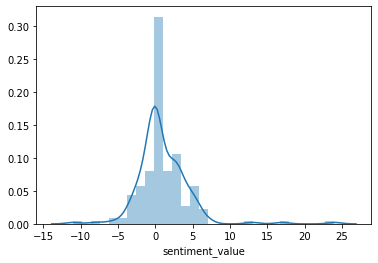

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value'])

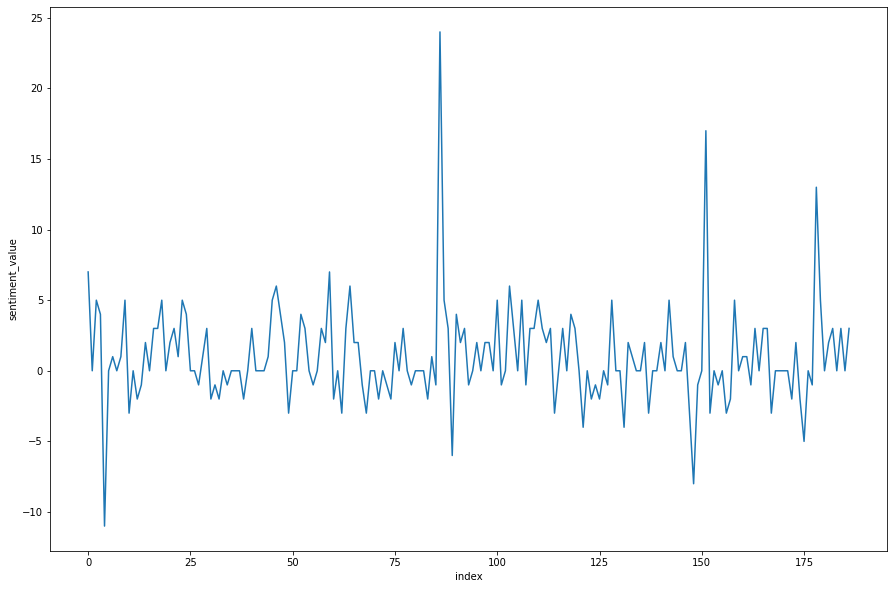

In [ ]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

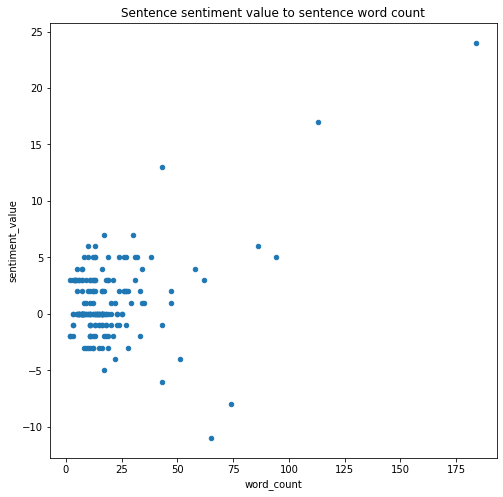

In [ ]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')